# Logistic Regression Project (Predict Ad click)

En este notebook vamos a aplicar la `Regresión logística` para indicar si un usuario de internet va a clickar en uno de nuestros anuncios. Vamos a intentar crear un modelo que consiga predecir esto en base a las caracteristicas del usuario.

Hablemos de las columnas/features que tenemos disponibles:

* '`Daily Time Spent on Site`': tiempo consumido en la web en minutos
* '`Age`': la edad del usuario en años
* '`Area Income`': el ingreso medio del área geográfica del usuario
* '`Daily Internet Usage`': Minutos de media que el usuario usa/consume intenet
* '`Ad Topic Line`': Headline del anuncio (investiga que puede ser esto!)
* '`City`': Ciudad del usuario
* '`Male`': Indicador si el usuario es o no un hombre
* '`Country`': País del usuario
* '`Timestamp`': Hora a la que el usuario ha clickado en la publicidad o ha cerrado la ventana. 
* '`Clicked on Ad`': Indicador si finalmente ha clickado o no en la publicidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Descarga y carga los datos

In [3]:
df =pd.read_csv('/Users/miguelopez/Desktop/Machine Learning/1-Supervised/1-Regression/5.Logistic_Regression/ejercicios/data/advertising.csv')

# 1. Exploratory Data Analysis (Descriptores + visualizaciones exploratorias)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [14]:
df.tail()   

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [6]:
df.shape #rows and columns 

(1000, 10)

In [7]:
df.count()# non-NA values in each column

Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

In [8]:
df.value_counts()#counts of unique values in a Series

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Ad Topic Line                               City              Male  Country                 Timestamp            Clicked on Ad
32.60                     38   40159.20     190.05                Customizable homogeneous contingency        Tylerport         0     Syrian Arab Republic    2016-02-12 03:39:09  1                1
75.92                     22   38427.66     182.65                Monitored context-sensitive initiative      Port Calvintown   0     Russian Federation      2016-02-26 01:18:44  0                1
75.55                     36   31998.72     123.71                Decentralized attitude-oriented interface   South Davidmouth  1     Bosnia and Herzegovina  2016-03-12 06:05:12  1                1
                               73234.87     159.24                Managed grid-enabled standardization        Ramirezside       0     Liechtenstein           2016-05-09 02:58:58  1                1
75.64          

In [9]:
df.isnull().sum()   # sum per column of missing values 


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
df.describe()# statistical summary 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


array([[<AxesSubplot: title={'center': 'Daily Time Spent on Site'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Area Income'}>,
        <AxesSubplot: title={'center': 'Daily Internet Usage'}>],
       [<AxesSubplot: title={'center': 'Male'}>,
        <AxesSubplot: title={'center': 'Clicked on Ad'}>]], dtype=object)

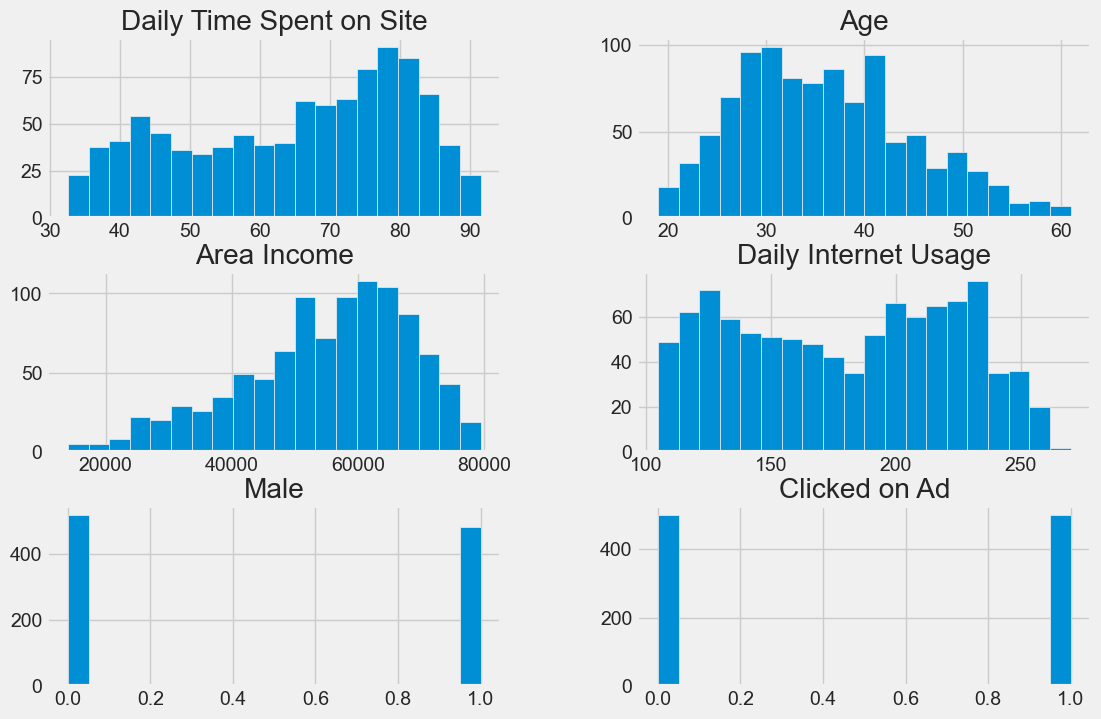

In [11]:
# distribution of values for each column 
df.hist(bins=20, figsize=(12,8)) 


In [21]:
corr = df.corr()# correlation between all variables 

corr

/var/folders/m8/hp9mxxbj6dv9x3px18fy22_r0000gn/T/ipykernel_724/253476215.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# correlation between all variables


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<AxesSubplot: >

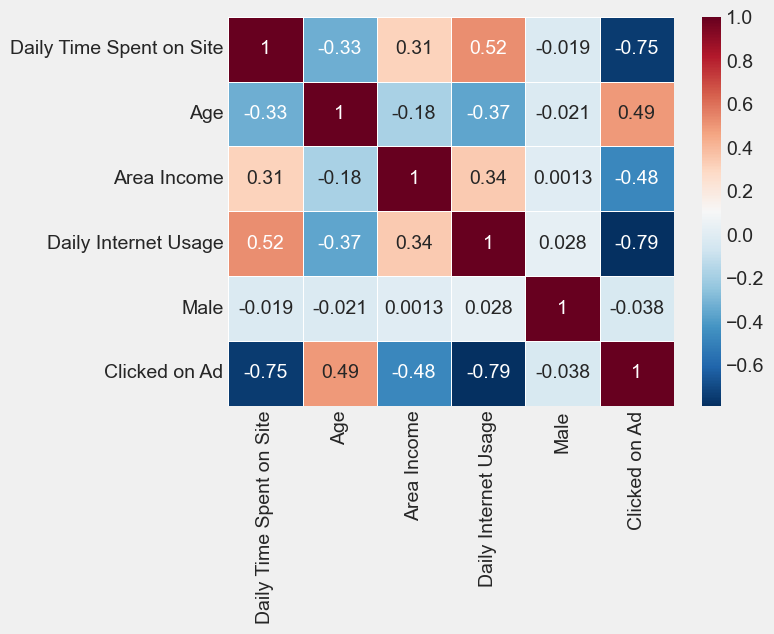

In [22]:
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)  

In [15]:
sns.pairplot(df ['Clicked on Ad'], hue='species')

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

# 2. Prepara tus datos para la Logistic Regression



#### 1. Feature engineering



#### 2. Separación Train-test 



#### 3. StandardScaler()


In [27]:
# Feature Engineering / LabelEncoder    
from sklearn.preprocessing import LabelEncoder  


The purpose of LabelEncoder, is to encode categorical text features to numeric values, which is often required for machine learning algorithms. Converting text categories to integers allows the models to mathematically interpret the categories.

This is an important data transformation step when working with categorical data for machine learning. The code fits the encoding on the training data, then applies it to transform the categorical columns to encoded integer values. This encodes the data into a format that can be used for modeling.

It outputs the same data frame but with the selected columns now encoded as integer values instead of text values.

It does this by creating a LabelEncoder object. LabelEncoder is a transformer that encodes text labels to integers. It is fit on the data to get the mapping of text labels to integers.

https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/

In [28]:
'''Encode categorical text features
 to numeric values to allow 
 the models to mathematically 
 interpret the text features.
'''
enc=LabelEncoder()  
df["Country"] = enc.fit_transform(df['Country'])
df["City"] = enc.fit_transform(df['City'])

In [40]:

# Feautres X, and targety.
X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line'], axis=1)
y = df['Clicked on Ad']





The StandardScaler fits on X_train and scales it to have zero mean and unit variance. This standardizes the features.

The same scaling is applied to X_test using .transform().

StandardScaling the features is useful for many machine learning models, to normalize the data and make convergence faster and more stable.

The key steps are splitting into train/test, fitting scaling on train, then applying same scaling to test. This workflow avoids data leakage and standardizes the features for modeling.

Splitting data and scaling are common preprocessing steps before training machine learning models. The train/test split creates representative subsets for training and evaluation. Scaling puts all features on the same scale so no one feature dominates.

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/



In [43]:
# libraries  StandardScaler / train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [37]:
'''Splitting train and test 
 70% train, 30% in test,
random seed42 .'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3  , random_state=42)   

In [38]:
# Standarise features (X_train, X_test) to zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Implementa la Logistic Regression en Scikit-Learn y a predecir!

In [44]:

modelo = LogisticRegression() # create a model object
modelo.fit(X_train, y_train) # fit the model to the training data

y_pred = modelo.predict(X_test)# saves predictions on y_test

# 4. Evalúa los modelos que lances


Evaluate(y_test, y_pred) It is a critical step in validating and analyzing the real-world effectiveness of the model.

evaluate the performance of the logistic regression model on the test set.

By passing y_test and y_pred into evaluate(), it will calculate various evaluation metrics: 

**Accuracy** <br>
 Overall how often the model correctly predicts the target
**Precision** <br>
 Of all predicted positive cases, how many were actually positive,<br>
**Recall**<br> 
Of all actual positive cases, how many did the model correctly predict<br>
**F1-score**<br> 
 Balance of precision and recall

Additionally, evaluate() will produce a confusion matrix, which summarizes how many examples the model correctly or incorrectly classified for each actual class.

https://realpython.com/logistic-regression-python/
 





#### 1. Matriz de confusión



#### 2. Precision


In [64]:
precision = precision_score(y_test, y_pred)
precision  

0.9801324503311258

TP/(TP+FP)



#### 3. Recall


In [73]:
recall = recall_score(y_test, y_pred)
recall

0.961038961038961



#### 4. F1 Score


In [74]:
f1 = f1_score(y_test, y_pred)
f1

0.9704918032786884

In [75]:
acc= accuracy_score(y_test, y_pred)
acc

0.97

In [ ]:
#  clasification report method 



#### 5. ROC curve (píntala también!)

In [107]:
from sklearn.metrics import roc_curve
rc_plot = roc_curve(y_test, y_pred)

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred) # shows score 

0.9702455079167409

In [124]:
def plot_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2) 
    plt.plot([0, 1], [0, 1], "b--")# false positive rate (fpr) vs true positive rate (tpr), 
    plt.axis([0, 1, 0, 1]) # axis x,y
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC')

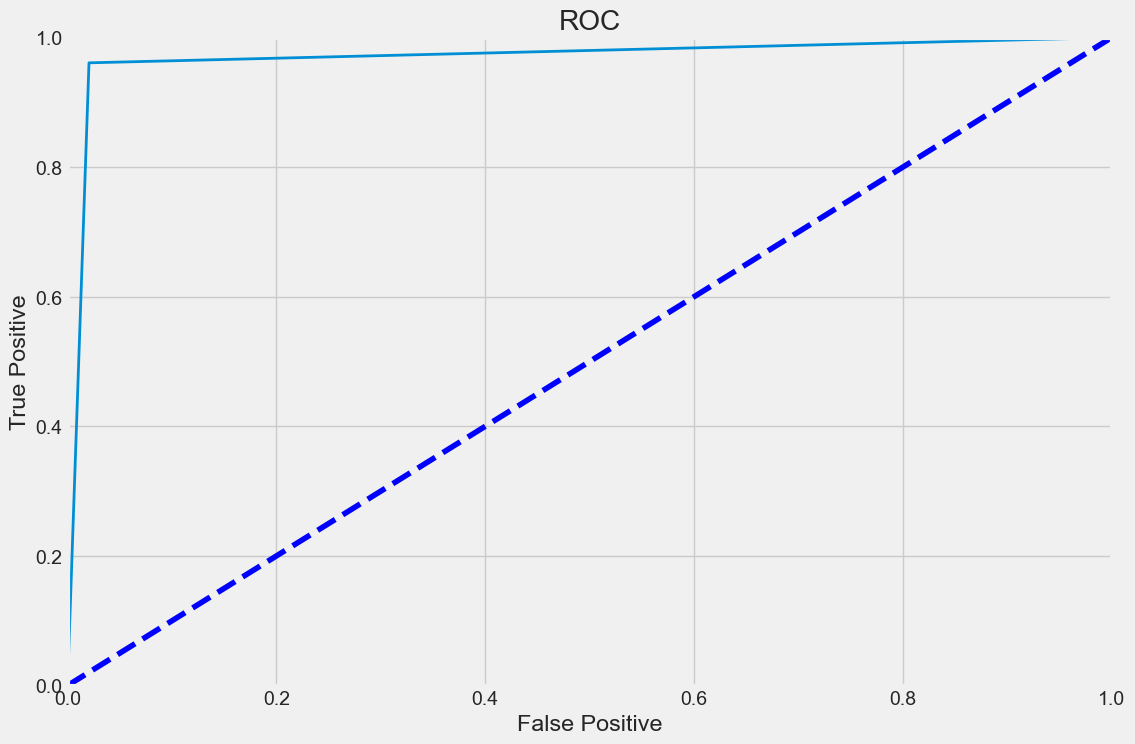

In [125]:
plt.figure(figsize=(12,8)) 
plot_curve(fpr,tpr)

plt.show()

Calculates the false positive rate (FPR) and true positive rate (TPR) for different probability thresholds of the positive class prediction.

It returns 3 arrays:

**r_curve[0]** - The FPR values for different thresholds<br>
**r_curve[1]** - The TPR values for different thresholds<BR>
**r_curve[2]** - The threshold values used to calculate FPR and TPR<br>

Plotting TPR vs FPR at different thresholds gives the ROC curve.

The area under the ROC curve (AUC) indicates how well the model distinguishes between the positive and negative classes.<br>

 * An AUC of 1 is perfect, 0.5 is random guessing.

It generates the data needed to plot the ROC curve and calculate AUC, which helps evaluate the predictive power of a binary classification model like logistic regression.<br>

*  The ROC curve visualizes the tradeoff between true positives and false positives.



#### 6. P-R curve

In [80]:
from sklearn.metrics import precision_recall_curve

p_r_c = precision_recall_curve(y_test, y_pred)

p_r_c

(array([0.51333333, 0.98013245, 1.        ]),
 array([1.        , 0.96103896, 0.        ]),
 array([0, 1]))

Calculates precision and recall values for different probability thresholds of the positive class prediction.

It returns 3 arrays:

**Precisions** - The precision values for different probability thresholds.<br>

**Recalls** - The recall values for different probability thresholds.<br>

**Thresholds**- The probability thresholds used to calculate precision and recall.<br>

This allows us to analyze the precision-recall tradeoff by plotting precision vs. recall at different threshold values. We can see where precision or recall drops off and select an optimal threshold.

Overall this gives us another view into model performance by analyzing precision and recall, rather than just relying on accuracy metrics. The full precision-recall curve gives a very complete picture of model behavior.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

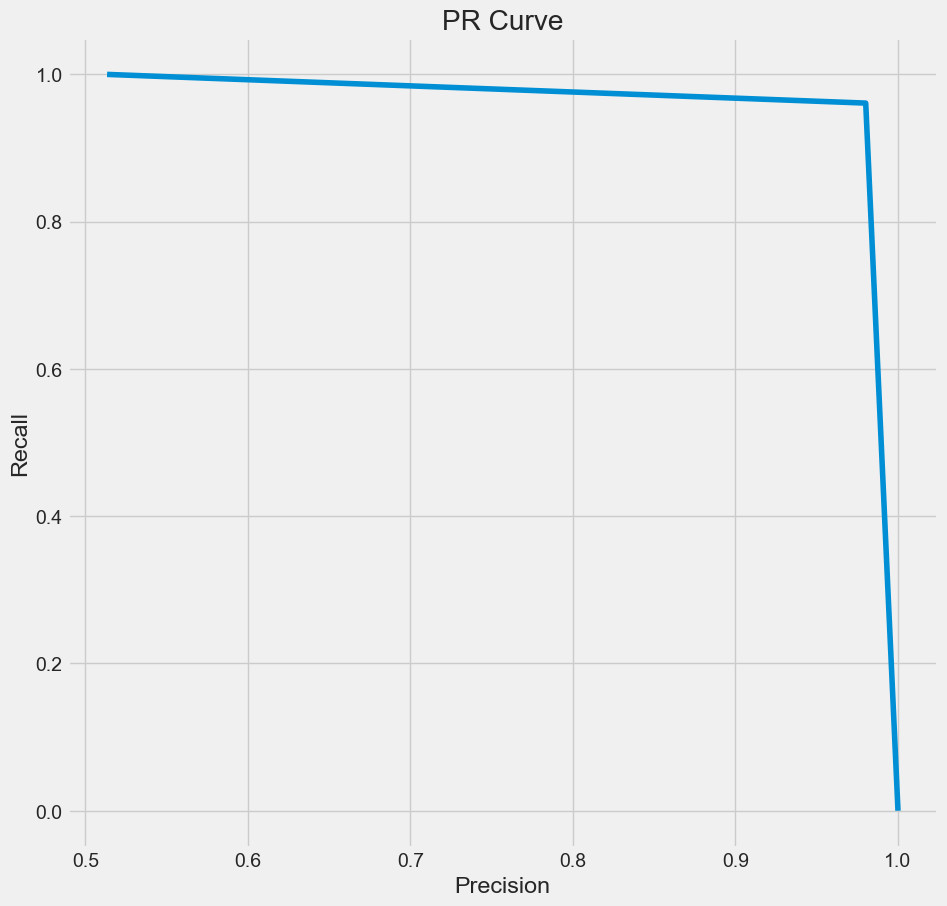

In [77]:
plt.figure(figsize=(10, 10))
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve");